In [1]:
 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
 

In [26]:
data= pd.read_csv("titanic-passengers (1).csv",sep=";")
data.head(893)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [28]:
data["Survived"]=data["Survived"].map({"yes":1, "No": 0, 'no':0, "Yes":1})  
data.head(99)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
94,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
95,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
96,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
97,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:

#if the age <15 can't get on the ship
data[ ((data["Age"]>70) | ( data["Age"]<15)) ]= data["Age"].mean()
data['Age'].describe()

count    714.000000
mean      32.002839
std       11.307905
min       15.000000
25%       24.000000
50%       29.699118
75%       38.000000
max       70.000000
Name: Age, dtype: float64

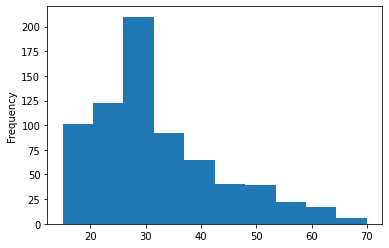

In [4]:

#plt.title("histogram of diffrent ages")
#plt.xlabel("age")
data["Age"].plot.hist()

In [5]:
data[ ((data['SibSp']<1)) ]= data['SibSp'].mean()
data['SibSp'].describe()

count    891.000000
mean       5.178390
std        7.924270
min        1.000000
25%        3.130221
50%        3.130221
75%        3.130221
max       29.699118
Name: SibSp, dtype: float64

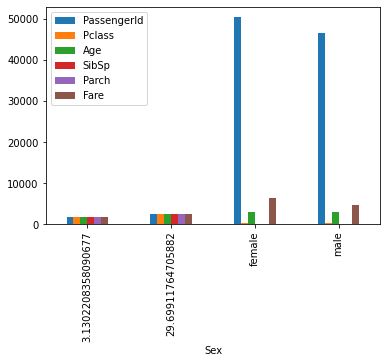

In [6]:
data.groupby('Sex').sum().plot(kind='bar');

In [7]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

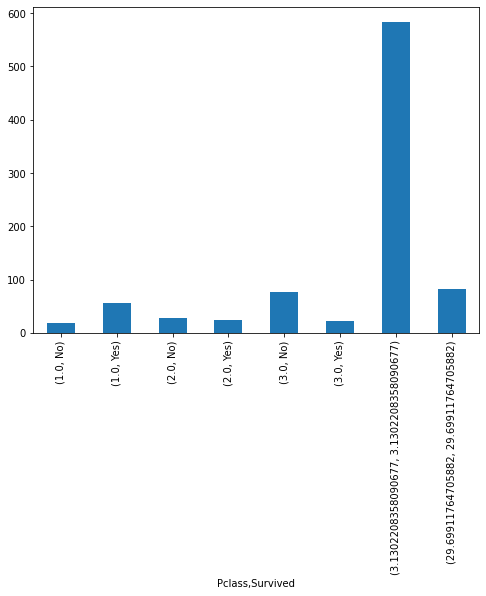

In [8]:
data.groupby(['Pclass', 'Survived'] )['Survived'].count().plot.bar(figsize=(8,6));


In [9]:
data.dropna(subset=['Name'], inplace=True)

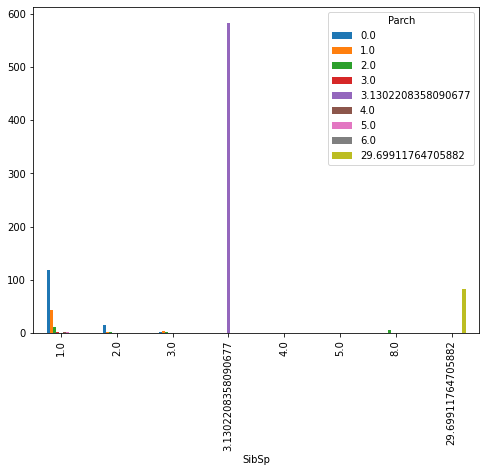

In [11]:
data.groupby(['SibSp', 'Parch'] )['Parch'].count().unstack(1).plot.bar(figsize=(8, 6));

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = data[['Pclass', 'SibSp','Parch']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.66


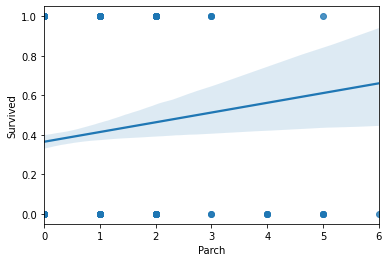

In [30]:
import seaborn as sns
sns.regplot(x='Parch',y='Survived',data=data)

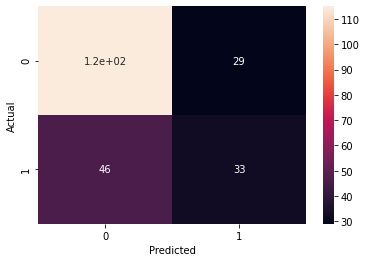

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

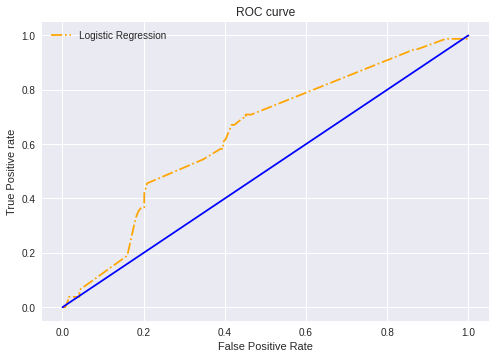

In [56]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='-.',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       144
           1       0.53      0.42      0.47        79

    accuracy                           0.66       223
   macro avg       0.62      0.61      0.61       223
weighted avg       0.65      0.66      0.65       223

